In [6]:
import numpy as np
import matplotlib.pyplot as plt
import search
import GraphNode as gn

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
M = 20
N = 20
thresh = 0.7
aMap = np.random.random((M,N))
ind1 = aMap >= thresh
aMap[ind1] = np.ones(np.sum(ind1))
ind0 = aMap < thresh
aMap[ind0] = np.zeros(np.sum(ind0))

start = (0,0)
reachable_dfs = search.dfs(aMap,start)
reachable_bfs = search.bfs(aMap,start)

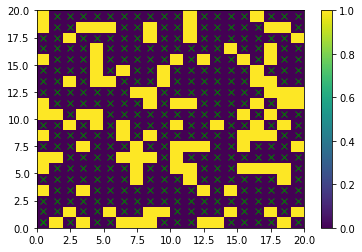

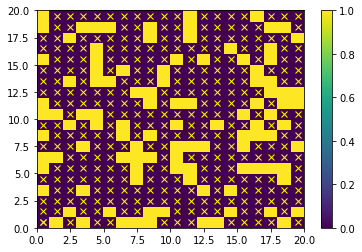

In [4]:
# DFS
fig,ax = plt.subplots()
im = plt.pcolormesh(aMap)
plt.autoscale(True,'both',True)
fig.colorbar(im,ax=ax)

x = []
y = []
for node in reachable_dfs:
    y.append(node[0]+0.5)
    x.append(node[1]+0.5)
plt.plot(x,y,color='green',marker='x',linestyle='None')

# BFS
fig,ax = plt.subplots()
im = plt.pcolormesh(aMap)
plt.autoscale(True,'both',True)
fig.colorbar(im,ax=ax)

x = []
y = []
for node in reachable_bfs:
    y.append(node[0]+0.5)
    x.append(node[1]+0.5)
plt.plot(x,y,color='yellow',marker='x',linestyle='None')

plt.show()

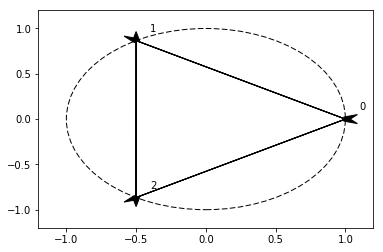

In [47]:
nodes = gn.deserialize('[{"val":0,"idx":0,"idxNgbs":[1,2]},{"val":1,"idx":1,"idxNgbs":[0,2]},{"val":2,"idx":2,"idxNgbs":[0,1]}]',plot=True)
# data = gn.serialize(nodes)